In [33]:
import cv2
import numpy as np
import os
import shutil
from random import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import scipy
from sklearn.metrics import classification_report, confusion_matrix
import kerastuner as kt
# from flask import Flask, request, render_template
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
# Define the source directory where all watermelon images are stored
source_directory = "Dataset"

# Define the target directory where you want to organize your data
target_directory = "E:/Omkar/Fourth Year/Major Project/final Dataset"

In [35]:
# Create target subdirectories for "round" and "oval" classes
os.makedirs(os.path.join(target_directory, "round"), exist_ok=True)
os.makedirs(os.path.join(target_directory, "oval"), exist_ok=True)

In [36]:
# Iterate through the source directory to separate images into classes
for filename in os.listdir(source_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Determine the class label (assuming filenames contain class information)
        if "round" in filename.lower():
            class_label = "round"
        elif "oval" in filename.lower():
            class_label = "oval"
        else:
            # Skip files that don't have a class label
            continue

        # Define the source file path and target file path
        src_path = os.path.join(source_directory, filename)
        target_path = os.path.join(target_directory, class_label, filename)

        # Copy or move the image to the corresponding class folder
        shutil.copy(src_path, target_path)  # Use shutil.move if you want to move instead of copy


In [38]:
# Shuffle the dataset (optional but recommended)
for class_label in ["round", "oval"]:
    class_directory = os.path.join(target_directory, class_label)
    class_files = os.listdir(class_directory)
    shuffle(class_files)
    for i, filename in enumerate(class_files):
        new_filename = f"{class_label}_{i}.jpg"  # Rename files if desired
        os.rename(os.path.join(class_directory, filename), os.path.join(class_directory, new_filename))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/Omkar/Fourth Year/Major Project/final Dataset\\round\\round148.png' -> 'E:/Omkar/Fourth Year/Major Project/final Dataset\\round\\round_0.jpg'

In [39]:
# Define the directory where your organized dataset is located
dataset_directory = r"E:\Omkar\Fourth Year\Major Project\final Dataset"

In [40]:
# Define the dimensions to which you want to resize your images
img_height, img_width = 128, 128  # Adjust these dimensions as needed

In [41]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,           # Normalize pixel values to [0, 1]
    rotation_range=20,            # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,        # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,       # Randomly shift images vertically by up to 10% of the height
    horizontal_flip=True,         # Randomly flip images horizontally
    vertical_flip=False,          # Don't flip images vertically
    validation_split=0.2          # Split the dataset into training (80%) and validation (20%)
)

In [42]:
# Use the flow_from_directory method to load and preprocess your dataset
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_height, img_width),
    batch_size=32,                # Adjust batch size as needed
    class_mode='categorical',     # Use 'categorical' for multi-class classification
    subset='training'             # Use the training split of the dataset
)

Found 650 images belonging to 2 classes.


In [43]:
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           # Use the validation split of the dataset
)

Found 162 images belonging to 2 classes.


In [44]:
# Optionally, you can access the class labels using:
class_labels = train_generator.class_indices
print("Class Labels:", class_labels)

Class Labels: {'oval': 0, 'round': 1}


In [45]:
# Define the CNN model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the feature maps
    layers.Flatten(),
    
    # Dense (fully connected) layers
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two output classes: round and oval
])

In [46]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

Total params: 3304898 (12.61 MB)
Trainable params: 3304898 (12.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Define the number of training epochs
epochs = 10  # Adjust as needed

In [48]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

NameError: name 'history' is not defined

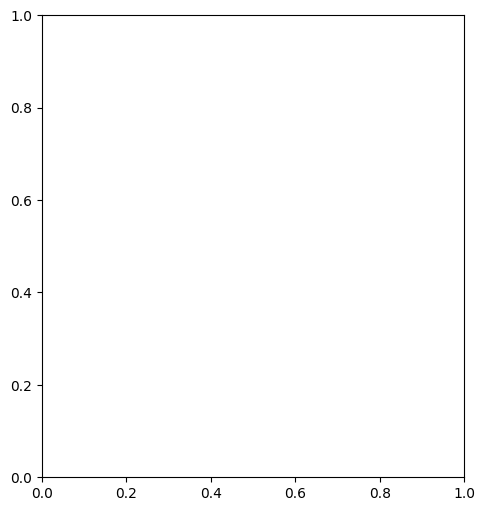

In [17]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model to a file (optional)
model.save("watermelon_shape_classifier.h5")

In [ ]:
# Generate predictions on the test dataset
predictions = model.predict(validation_generator)

6/6 [==============================] - 5s 765ms/step


In [ ]:
# Convert predictions to class labels (round or oval)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test generator
true_labels = validation_generator.classes

In [ ]:
# Print classification report with precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=["round", "oval"])
print("Classification Report:\n", report)

# Calculate and print confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", confusion)

# Calculate and print overall accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)
print("Overall Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

       round       0.53      0.55      0.54        84
        oval       0.50      0.49      0.49        78

    accuracy                           0.52       162
   macro avg       0.52      0.52      0.52       162
weighted avg       0.52      0.52      0.52       162

Confusion Matrix:
 [[46 38]
 [40 38]]
Overall Accuracy: 0.5185185185185185


In [ ]:
# Define a function to build the model with hyperparameters to be tuned
def build_model(hp):
    model = models.Sequential()
    
    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=3, default=2)
    for _ in range(num_conv_layers):
        model.add(layers.Conv2D(
            filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32),
            kernel_size=hp.Choice('conv_kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(img_height, img_width, 3)
        ))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Tune the number of dense layers and units
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, default=2)
    for _ in range(num_dense_layers):
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
            activation='relu'
        ))

    model.add(layers.Dense(2, activation='softmax'))  # Two output classes: round and oval

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs per trial
    factor=3,       # Reduction factor for the number of models
    directory='keras_tuner_logs',
    project_name='watermelon_shape_classification'
)

INFO:tensorflow:Reloading Tuner from keras_tuner_logs\watermelon_shape_classification\tuner0.json


In [ ]:
# Search for the best hyperparameters
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

Trial 29 Complete [00h 14m 10s]
val_accuracy: 0.5185185074806213

Best val_accuracy So Far: 0.9629629850387573
Total elapsed time: 02h 45m 33s

Search: Running Trial #30

Value             |Best Value So Far |Hyperparameter
1                 |3                 |num_conv_layers
256               |128               |conv_filters
3                 |3                 |conv_kernel_size
3                 |2                 |num_dense_layers
192               |448               |dense_units
0.01              |0.001             |learning_rate
10                |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/10
21/21 [==============================] - 111s 5s/step - loss: 110.4543 - accuracy: 0.5015 - val_loss: 0.6867 - val_accuracy: 0.4877
Epoch 2/10
21/21 [==============================] - 89s 4s/step - loss: 0.6966 - accuracy: 0.5815 - val_

KeyboardInterrupt: 

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
print(f"- Number of Convolutional Layers: {best_hps.get('num_conv_layers')}")
print(f"- Number of Dense Layers: {best_hps.get('num_dense_layers')}")
print(f"- Learning Rate: {best_hps.get('learning_rate')}")


Best Hyperparameters:
- Number of Convolutional Layers: 3
- Number of Dense Layers: 2
- Learning Rate: 0.001


In [ ]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [ ]:
# Load the trained model
model = tf.keras.models.load_model("watermelon_shape_classifier.h5")  # Replace with your model's file path

In [ ]:
# Function to preprocess a single image
def preprocess_image(image_path):
    # Load and resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img

In [ ]:
# Function to predict the watermelon shape from an image
def predict_shape(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make a prediction
    predictions = model.predict(img)
    
    # Convert predictions to class labels
    predicted_label = "round" if np.argmax(predictions) == 0 else "oval"
    
    return predicted_label

In [ ]:
# Example usage:
image_path = "4.png"  # Replace with the path to your test image
predicted_shape = predict_shape(image_path)
# print(type(predict_shape))
# print(f"The predicted shape of the watermelon is: {predicted_shape}")
if predicted_shape == "round":
    print("The predicted shape of the watermelon : oval")
else:
    print("The predicted shape of the watermelon : round")


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
